In [15]:
options(jupyter.plot_mimetypes ='image/png')

# Exercise 1

In [17]:
library(affy)

In [18]:
?mas5

mas5() executes the command for MAS5.0 expression measure. This function converts an instance of AffyBatch into an instance of ExpressionSet using the implementation of Affymetrix's MAS5.0 expression measure. Using mas5(object, normalize = TRUE, sc = 500, analysis = "absolute", ...)

In [19]:
?rma

rma() executes the command for Robust Multi-Array Average expression measure. This function conversts an AffyBatch object into an ExpressionSet object using the RMA expression measure. Using rma(object, subset=NULL, verbose=TRUE, destructive=TRUE, normalize=TRUE,
    background=TRUE, bgversion=2, ...)

# Exercise 2

In [22]:
setwd("~/Autumn2016/Week4/data_wk4")

In [23]:
getwd()

[1] "/projects/ddda6a8e-2bca-47f5-b1d6-79b2c48d0e30/Autumn2016/Week4/data_wk4"

# Exercise 3

In [25]:
load("Dilution.RDA")

In [26]:
show(Dilution)

AffyBatch object
size of arrays=640x640 features (35221 kb)
cdf=HG_U95Av2 (12625 affyids)
number of samples=4
number of genes=12625
annotation=hgu95av2
notes=


The data shows the size of the array is 640x640 (35221kb), cdf maps each gene that is in the array (12625 genes), and there are 4 samples.

# Exercise 4

In [27]:
eset_rma<-rma(Dilution)
head(eset_rma)

Background correcting
Normalizing
Calculating Expression


ExpressionSet (storageMode: lockedEnvironment)
assayData: 1 features, 4 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 20A 20B 10A 10B
  varLabels: liver sn19 scanner
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95av2 

In [28]:
eset_mas5<-mas5(Dilution)

background correction: mas 
PM/MM correction : mas 
expression values: mas 
background correcting...done.
12625 ids to be processed
|                    |
|####################|


In [29]:
e_rma<-exprs(eset_rma)
head(e_rma)


20A      20B      10A      10B     
100_g_at  8.039969 7.891522 8.022329 7.910679
1000_at   7.790839 7.661209 7.716827 7.622688
1001_at   5.175568 5.067023 5.082672 5.091804
1002_f_at 5.916532 5.754500 5.816628 5.741990
1003_s_at 6.335194 6.010436 6.198295 6.133995
1004_at   6.390533 6.147808 6.357680 6.260663

In [30]:
e_mas5<-exprs(eset_mas5)
head(e_mas5)

20A       20B      10A       10B      
100_g_at  548.98527 433.2680 424.96155 393.97712
1000_at   809.08453 699.3555 808.41458 701.34489
1001_at    70.01311 109.4756  81.87722  90.15127
1002_f_at 161.94720 172.0894 138.57740 166.27219
1003_s_at  52.33766 101.3367  33.09268  31.61867
1004_at   211.22394 148.7227 161.71606 133.46727

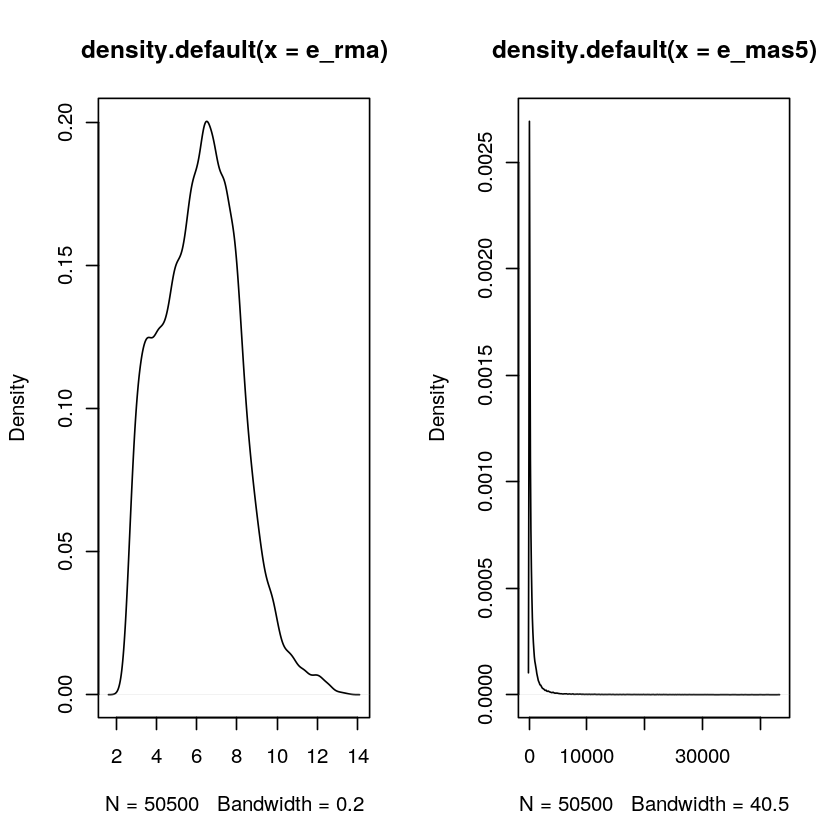

In [31]:
par(mfrow=c(1,2))
d1<-density(e_rma)
plot(d1)
d2<-density(e_mas5)
plot(d2)

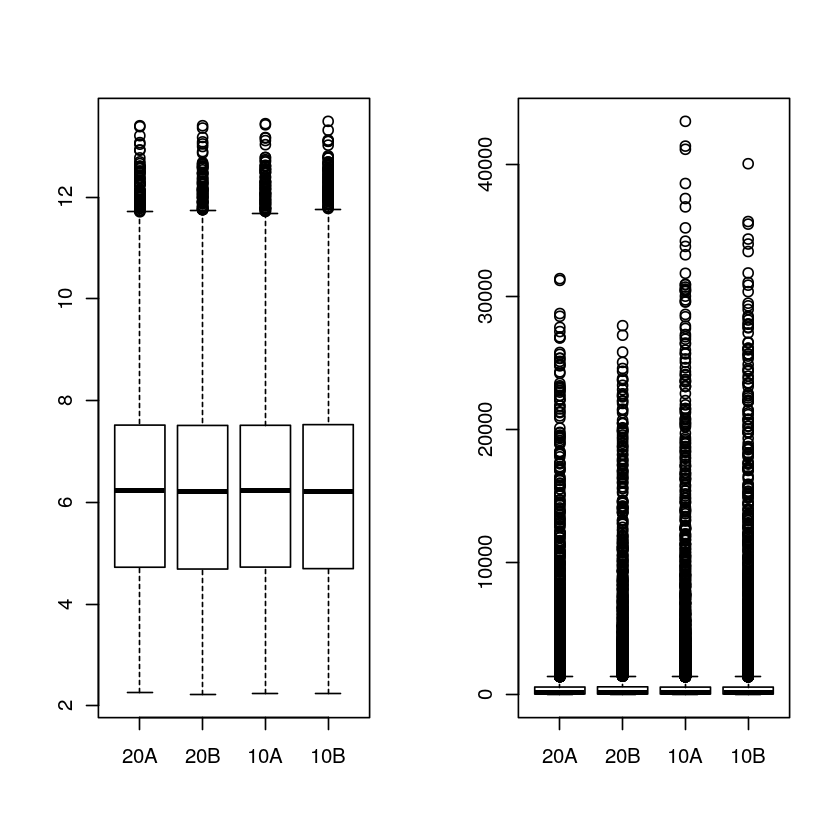

In [32]:
par(mfrow=c(1,2))
boxplot(e_rma)
boxplot(e_mas5)

In [33]:
log2e_mas5<-log2(e_mas5)
head(log2e_mas5)

20A      20B      10A      10B     
100_g_at  9.100624 8.759116 8.731189 8.621968
1000_at   9.660147 9.449882 9.658952 9.453980
1001_at   6.129553 6.774465 6.355390 6.494276
1002_f_at 7.339380 7.427014 7.114548 7.377403
1003_s_at 5.709777 6.663013 5.048440 4.982705
1004_at   7.722630 7.216481 7.337319 7.060342

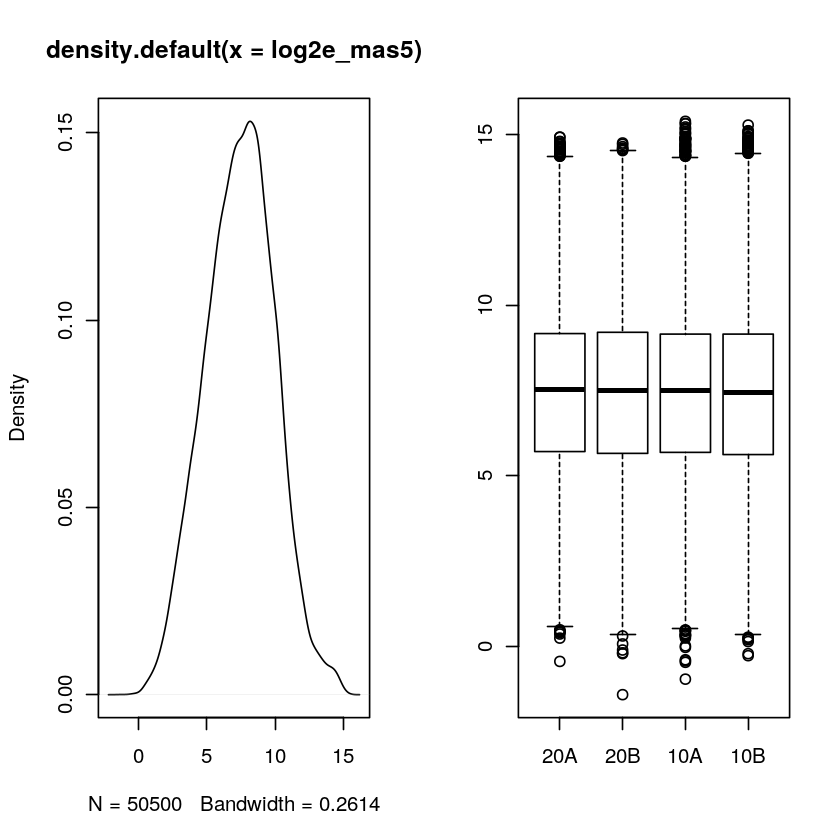

In [34]:
par(mfrow=c(1,2))
log2d<-density(log2e_mas5)
plot(log2d)
boxplot(log2e_mas5)

# Exercise 6

In [35]:
library(puma)

Loading required package: oligo
Loading required package: oligoClasses
Welcome to oligoClasses version 1.32.0

Attaching package: ‘oligoClasses’

The following object is masked from ‘package:affy’:

    list.celfiles

Loading required package: Biostrings
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: IRanges
Loading required package: XVector
Welcome to oligo version 1.34.2

Attaching package: ‘oligo’

The following objects are masked from ‘package:affy’:

    intensity, MAplot, mm, mm<-, mmindex, pm, pm<-, pmindex,
    probeNames, rma

Loading required package: mclust
Package 'mclust' version 5.2
Type 'citation("mclust")' for citing this R package in publications.


In [36]:
setwd("~/Autumn2016/Week4/data_wk4")

In [39]:
load("Dilution.RDA")
show(Dilution)

AffyBatch object
size of arrays=640x640 features (35221 kb)
cdf=HG_U95Av2 (12625 affyids)
number of samples=4
number of genes=12625
annotation=hgu95av2
notes=


In [40]:
eset_mmgmos<-mmgmos(Dilution)

Model optimising ..........................
Expression values calculating ..........................
Done.


In [41]:
e_puma<-exprs(eset_mmgmos)
head(e_puma)

20A      20B      10A      10B     
100_g_at  6.001526 5.722812 5.815477 5.307755
1000_at   7.127891 7.079451 7.074755 6.822553
1001_at   4.647841 4.768898 4.076775 4.134697
1002_f_at 5.622159 5.522768 5.307126 5.423579
1003_s_at 1.640298 1.524951 1.961328 1.091461
1004_at   4.719888 4.156653 5.027276 4.164188

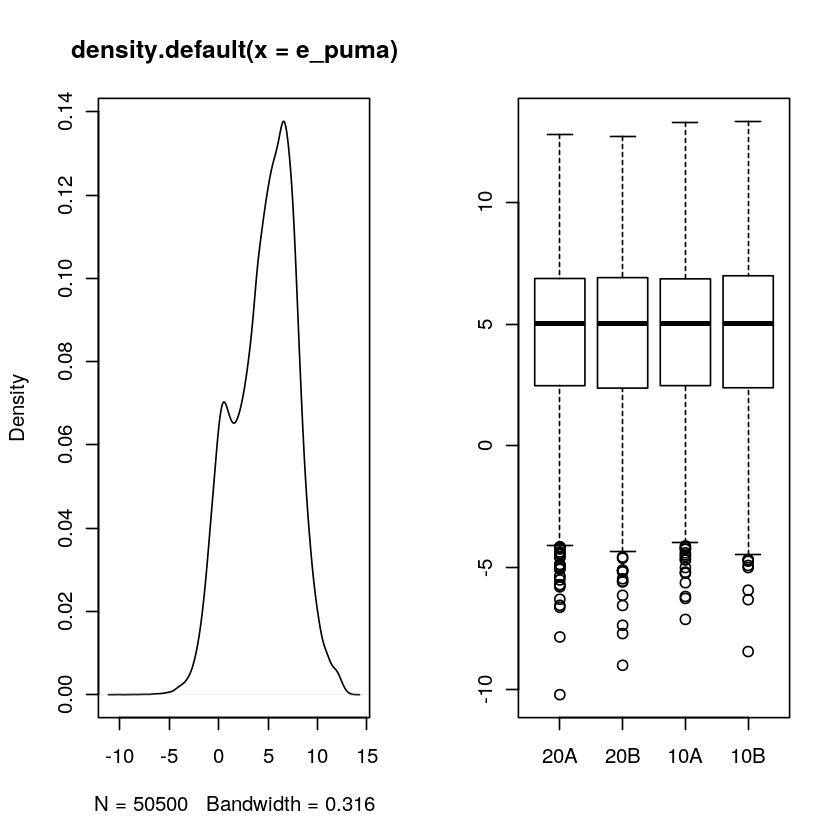

In [42]:
par(mfrow=c(1,2))
pumad<-density(e_puma)
plot(pumad)
boxplot(e_puma)

In [43]:
e_puma[e_puma < 0]<- 0

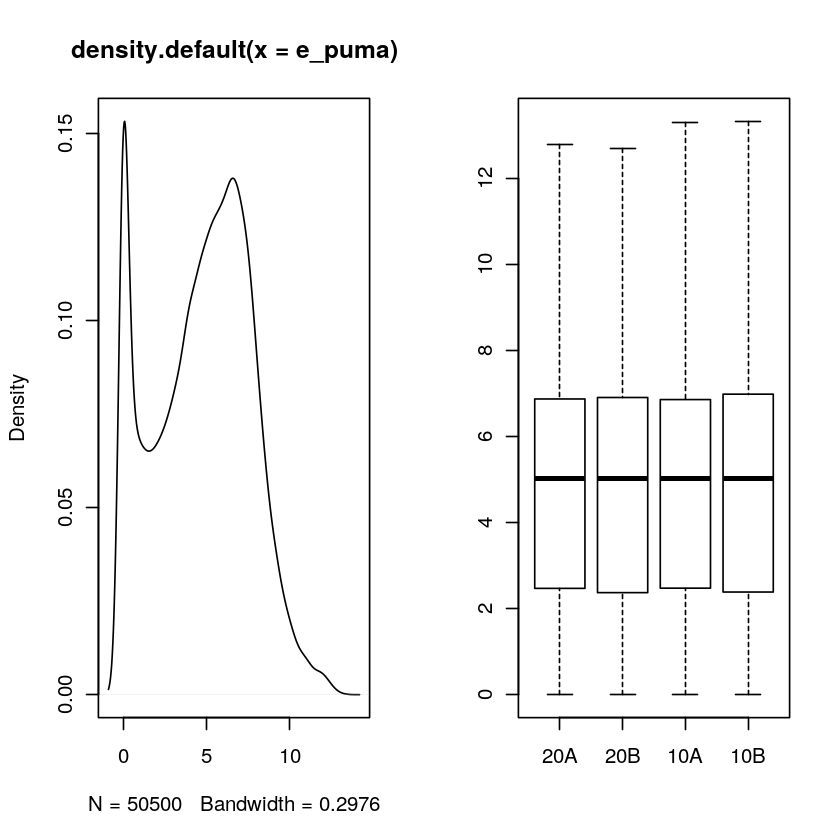

In [44]:
par(mfrow=c(1,2))
pumad<-density(e_puma)
plot(pumad)
boxplot(e_puma)

In [45]:
setwd("~/Autumn2016/Week4/data_wk4")

In [46]:
load("affybatch.estrogen.RDA")
show(affybatch.estrogen)

AffyBatch object
size of arrays=640x640 features (19 kb)
cdf=HG_U95Av2 (12625 affyids)
number of samples=8
number of genes=12625
annotation=hgu95av2
notes=


In [47]:
pData(affybatch.estrogen) <- data.frame(
"estrogen"=c("absent","absent","present","present"
,"absent","absent","present","present")
, "time.h"=c("10","10","10","10","48","48","48","48")
, row.names=rownames(pData(affybatch.estrogen)))

In [50]:
eset_estrogen_mmgmos<-mmgmos(affybatch.estrogen)

Model optimising ..........................
Expression values calculating ..........................
Done.


In [51]:
e_puma<-exprs(eset_estrogen_mmgmos)
head(e_puma)

low10-1.cel low10-2.cel high10-1.cel high10-2.cel low48-1.cel
100_g_at   4.5636890   5.0542649   4.3147335    3.323781455  4.1293564 
1000_at    7.0441500   6.7470287   6.1633587    6.023999895  5.9510488 
1001_at   -1.5355806  -1.4367264  -1.9746399   -0.097707515  1.1476384 
1002_f_at -1.4571550  -0.9999348  -1.9062753   -1.185054088 -2.2071496 
1003_s_at -2.0247799  -0.5052158  -0.1332393    0.889561658  0.6175251 
1004_at    0.0781212   0.1790070  -0.3844425   -0.006124629  1.9511443 
          low48-2.cel high48-1.cel high48-2.cel
100_g_at   4.5447948   4.039069     4.1924974  
1000_at    5.9870338   5.940411     5.6196507  
1001_at   -0.3794378  -2.924452     1.0317169  
1002_f_at -1.9164036  -1.300294    -1.9311610  
1003_s_at  2.0123121   1.550318     0.5264854  
1004_at    1.3045113   2.029137     2.5490697

In [55]:
detach(package:puma, unload = TRUE)

In [58]:
library(affy)

In [60]:
setwd("~/Autumn2016/Week4/data_wk4")

In [61]:
load("affybatch.estrogen.RDA")
show(affybatch.estrogen)

AffyBatch object
size of arrays=640x640 features (19 kb)
cdf=HG_U95Av2 (12625 affyids)
number of samples=8
number of genes=12625
annotation=hgu95av2
notes=


In [62]:
eset_estrogen_rma <- rma(affybatch.estrogen)


ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘rma’ for signature ‘"AffyBatch"’
